6331
(array([4.882e+03, 6.420e+02, 4.190e+02, 1.870e+02, 1.090e+02, 5.300e+01,
       2.100e+01, 1.000e+01, 7.000e+00, 1.000e+00]), array([0.        , 0.74348479, 1.48696958, 2.23045436, 2.97393915,
       3.71742394, 4.46090873, 5.20439351, 5.9478783 , 6.69136309,
       7.43484788]), <a list of 10 Patch objects>)
[0.37174239 1.11522718 1.85871197 2.60219676 3.34568154 4.08916633
 4.83265112 5.57613591 6.31962069 7.06310548]
[859.96576035  -1.75421861] [[2.24108892e+03 2.60325860e+00]
 [2.60325860e+00 3.16288489e-03]]


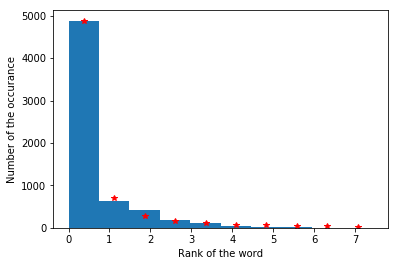

In [83]:
import math
import matplotlib.pyplot as plt 
import numpy as np

fp = open('Alice.txt','r',encoding='UTF-8')
line = fp.readline()
my_dict = {}

while line:
    s = line.split()
    for x in s:
        if x not in my_dict:
             my_dict[x] = 1
        else:
             my_dict[x] += 1
    line = fp.readline()
    
fp.close()

num = []

for key in my_dict:
    num.append(my_dict[key])

print(len(num))
num.sort()
num.reverse()
lognum=np.log(num)

a=plt.hist(lognum,10)
print(a)
dx=(a[1][1]-a[1][0])
bin_center=np.array(a[1][0:-1])+dx/2
print(bin_center)

from scipy import optimize
def test_func(x, amp, alpha):
    return amp * x**alpha
params, params_covariance = optimize.curve_fit(test_func, bin_center, a[0])
print(params, params_covariance)
plt.plot(bin_center, test_func(bin_center, params[0],params[1]), "r*", label='Fitted functoin')

plt.xlabel('Rank of the word')
plt.ylabel('Number of the occurance')
plt.show()

In [65]:
print(params[1])

-7.273288150277717
